## Topic
#### Data Model Proposals for Modelling of Processing of Food in Appliances

#### Dataset: https://www.kaggle.com/datasets/lgarg442/microwave-usage-data

Let's import the dataset first from Kaggle

In [3]:
!pip install -q kaggle

In [2]:
!kaggle datasets download lgarg442/microwave-usage-data

Dataset URL: https://www.kaggle.com/datasets/lgarg442/microwave-usage-data
License(s): apache-2.0




  0%|          | 0.00/5.52k [00:00<?, ?B/s]
100%|##########| 5.52k/5.52k [00:01<00:00, 4.78kB/s]
100%|##########| 5.52k/5.52k [00:01<00:00, 4.77kB/s]


In [1]:
import zipfile
import os

zip_file_path = "microwave-usage-data.zip"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(".") 

print(f'Successfully extracted {zip_file_path}')

Successfully extracted microwave-usage-data.zip


# Section 1: Exploratory Data Analysis

### Now we need to read the csv file

In [2]:
import pandas as pd

microwave_df = pd.read_csv("microwave_usage_dataset.csv")

In [3]:
# let's inspect the dataframe
microwave_df.head()

,Timestamp,User_ID,Mode_Selected,Duration_Seconds,Power_Level,Door_Open_Count,Food_Type
0,2025-05-15 21:45:43,User_055,Defrost,123,Low,1,Vegetables
1,2025-06-06 21:05:13,User_089,Popcorn,371,Medium,2,Vegetables
2,2025-05-17 10:30:18,User_049,Reheat,436,Medium,3,Unknown
3,2025-05-27 20:39:03,User_020,Defrost,502,High,1,Pizza
4,2025-05-28 00:06:52,User_088,Custom,420,Low,3,Chicken


In [4]:
# we drop the User_ID since we DON'T want any personal data
microwave_df = microwave_df.drop('User_ID', axis = 'columns')

In [5]:
# check non-null count and type
microwave_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Timestamp         400 non-null    object
 1   Mode_Selected     400 non-null    object
 2   Duration_Seconds  400 non-null    int64 
 3   Power_Level       400 non-null    object
 4   Door_Open_Count   400 non-null    int64 
 5   Food_Type         400 non-null    object
dtypes: int64(2), object(4)
memory usage: 18.9+ KB


In [6]:
# check general stats for data
microwave_df.describe(include='all')

,Timestamp,Mode_Selected,Duration_Seconds,Power_Level,Door_Open_Count,Food_Type
count,400,400,400.000000,400,400.000000,400
unique,400,4,NaN,3,NaN,5
top,2025-05-15 21:45:43,Popcorn,NaN,Medium,NaN,Chicken
freq,1,104,NaN,158,NaN,88
mean,NaN,NaN,314.127500,NaN,1.955000,NaN
std,NaN,NaN,162.262778,NaN,0.796594,NaN
min,NaN,NaN,33.000000,NaN,1.000000,NaN
25%,NaN,NaN,188.750000,NaN,1.000000,NaN
50%,NaN,NaN,307.000000,NaN,2.000000,NaN
75%,NaN,NaN,449.750000,NaN,3.000000,NaN


In [7]:
# since we have no null values then we don't need to fill or remove any datapoints

In [8]:
#convert 'Timestamp' to datetime object
microwave_df['Timestamp'] = pd.to_datetime(microwave_df['Timestamp'], errors = 'coerce')

# break up datetime by hour, dayofweek and month
microwave_df['Hour'] = microwave_df['Timestamp'].dt.hour
microwave_df['DayOfWeek'] = microwave_df['Timestamp'].dt.day_name()
microwave_df['Month'] = microwave_df['Timestamp'].dt.month

In [9]:
# now we need to check counts to see if we need to drop any of these values

print("Unique month counts:")
print(microwave_df['Month'].value_counts().sort_index())

print("\nUnique Day of week counts:")
print(microwave_df['DayOfWeek'].value_counts().sort_index())

print("\nUnique hour counts:")
print(microwave_df['Hour'].value_counts().sort_index())

Unique month counts:
5    241
6    159
Name: Month, dtype: int64

Unique Day of week counts:
Friday       46
Monday       54
Saturday     66
Sunday       42
Thursday     57
Tuesday      61
Wednesday    74
Name: DayOfWeek, dtype: int64

Unique hour counts:
0     22
1     26
2     22
3     19
4     16
5     14
6     22
7     13
8     16
9     15
10    21
11    13
12    12
13    18
14    17
15    11
16    11
17    16
18    18
19    17
20    17
21    17
22    16
23    11
Name: Hour, dtype: int64


In [10]:
# drop months because only two are represented
microwave_df = microwave_df.drop('Month', axis = 'columns')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Amit\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


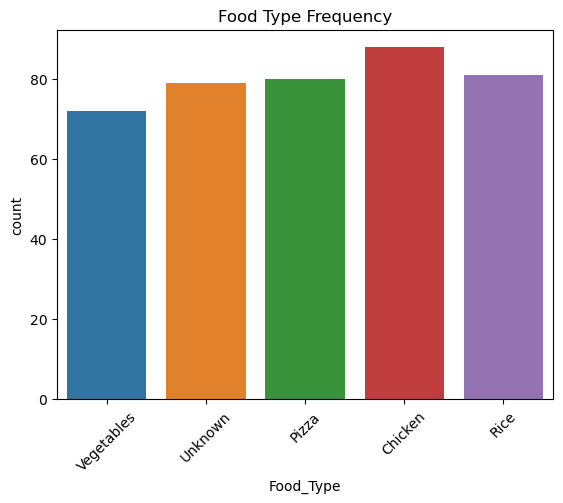

In [12]:
# examine the most common foodtypes
sns.countplot(x='Food_Type', data=microwave_df)
plt.title("Food Type Frequency")
plt.xticks(rotation=45)
plt.show()

Chicken is the most commonly microwaved foodtype.

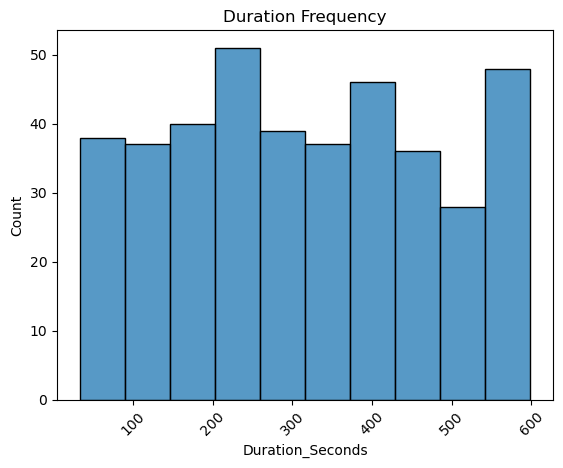

In [13]:
# treat duration as a continuous variable (assuming it is a dial)
# examine the most common foodtypes
sns.histplot(x='Duration_Seconds', data=microwave_df)
plt.title("Duration Frequency")
plt.xticks(rotation=45)
plt.show()

200-250 seconds is the most common duration range, followed by 550 - 600 seconds. There is no normal distribution for this data.

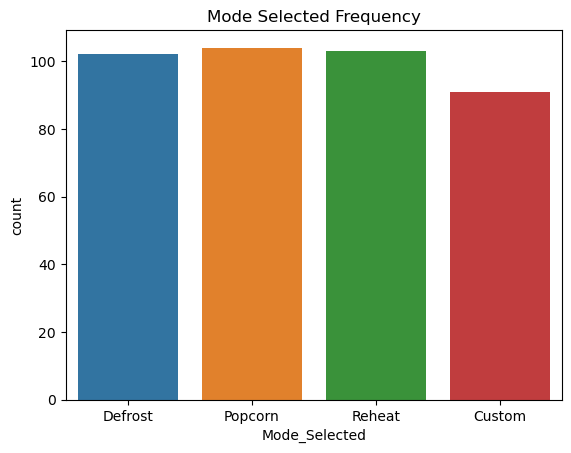

In [14]:
sns.countplot(x='Mode_Selected', data=microwave_df)
plt.title("Mode Selected Frequency")
plt.show()

We can see that Custom mode is the least popular, while Defrost, Popcorn and Reheat are all used similiarly often.

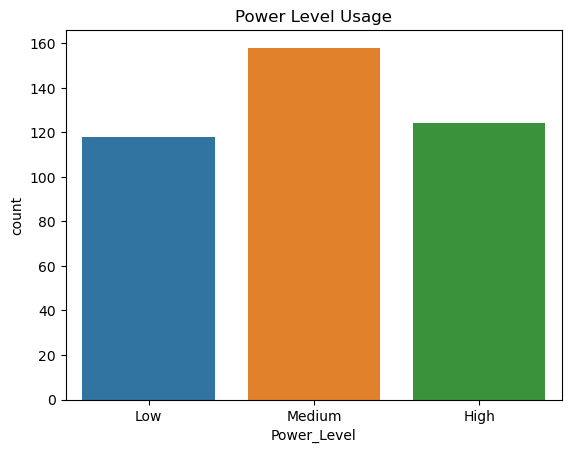

In [15]:
sns.countplot(x='Power_Level', data=microwave_df)
plt.title("Power Level Usage")
plt.show()

It seems that the Medium power setting is the most frequently used one.

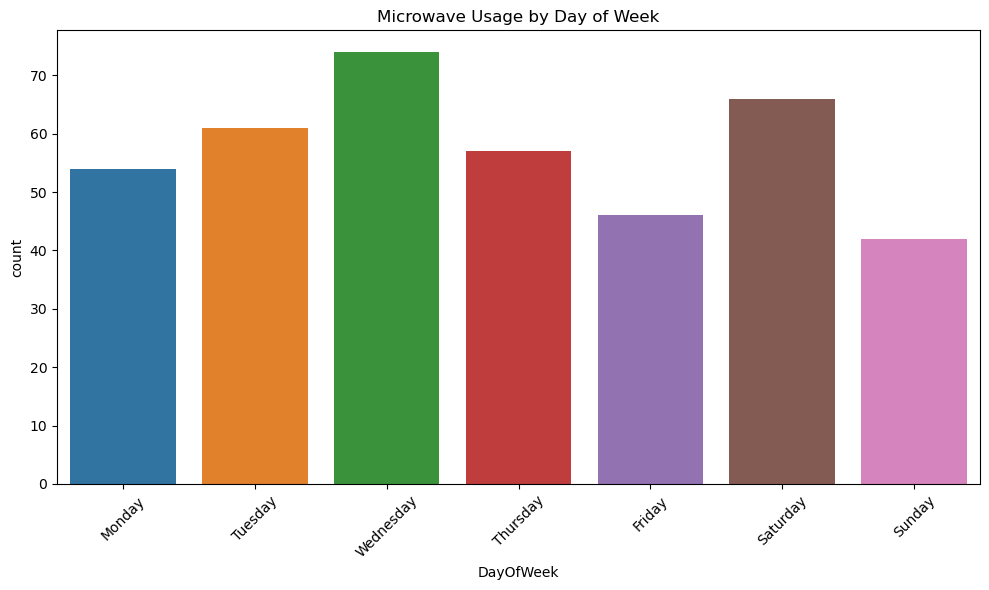

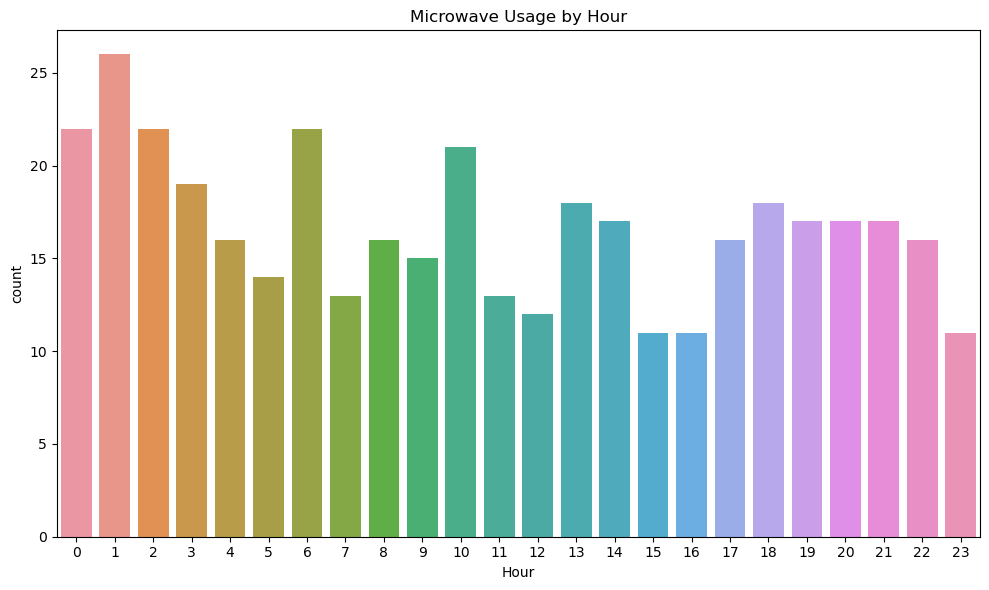

In [16]:
# plot the frequency of date and times
# Day of week
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=microwave_df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Microwave Usage by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=microwave_df)
plt.title('Microwave Usage by Hour')
plt.tight_layout()
plt.show()

The microwave is used most frequently on Wednesdays. Moreover, it is most frequently used at 0100 (1 am).

# Section 2: Feature Engineering

In [17]:
# first we perform ordinal encoding
power_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

# map the values in a new column
microwave_df['Power_Level_Value'] = microwave_df['Power_Level'].map(power_mapping)

# create a new column Power_Consumed as Duration * Power_Level_Value
microwave_df['Power_Consumed'] = microwave_df['Duration_Seconds'] * microwave_df['Power_Level_Value']

In [18]:
microwave_df = microwave_df.drop(['Timestamp','Power_Level'],axis = 'columns')

In [19]:
microwave_df.head()

,Mode_Selected,Duration_Seconds,Door_Open_Count,Food_Type,Hour,DayOfWeek,Power_Level_Value,Power_Consumed
0,Defrost,123,1,Vegetables,21,Thursday,1,123
1,Popcorn,371,2,Vegetables,21,Friday,2,742
2,Reheat,436,3,Unknown,10,Saturday,2,872
3,Defrost,502,1,Pizza,20,Tuesday,3,1506
4,Custom,420,3,Chicken,0,Wednesday,1,420


In [20]:
# now we are going to perform one hot encoding for our machine learning later, so we will create a separate copy of the df
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_array = encoder.fit_transform(microwave_df[['Mode_Selected', 'Food_Type','DayOfWeek','Hour']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Mode_Selected', 'Food_Type','DayOfWeek','Hour']))

microwave_df_ml = pd.concat([microwave_df, encoded_df], axis=1)

In [21]:
microwave_df_ml = microwave_df_ml.drop(['Mode_Selected', 'Food_Type','DayOfWeek','Hour','Duration_Seconds','Power_Level_Value'], axis = 'columns')

In [22]:
microwave_df_ml.head()

,Duration_Seconds,Door_Open_Count,Power_Level_Value,Power_Consumed,Mode_Selected_Defrost,Mode_Selected_Popcorn,Mode_Selected_Reheat,Food_Type_Pizza,Food_Type_Rice,Food_Type_Unknown,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,123,1,1,123,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,371,2,2,742,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,436,3,2,872,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,502,1,3,1506,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,420,3,1,420,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's compare power_consumed with the categorical variables. 
We will examine if the levels have any effect on the target variable.
We can test for normality with Shapiro-Wilk test first. If normal we can use t-test or One-Way ANOVA and if it is not normal we can use Mann-Whitney or Kruskall Wallis test (rank sums).

In [33]:
from scipy.stats import shapiro, f_oneway, kruskal

def compare_groups(categorical_vars):
    df = microwave_df
    target = 'Power_Consumed'
    results = {}

    for cat in categorical_vars:
        print(f"For {target} across {cat}:")
        groups = [df[target][df[cat] == g] for g in df[cat].unique()]
        
        normal = True
        for g in df[cat].unique():
            data = df[target][df[cat] == g]
            stat, p = shapiro(data)
            print(f"{cat} = {g}: Shapiro-Wilk p: {p:.4f}")
            if p <= 0.05:
                normal = False
        
        if normal:
            stat, p = f_oneway(*groups)
            print(f"ANOVA p: {p:.4f}")
            test_used = "ANOVA"
        else:
            stat, p = kruskal(*groups)
            print(f"Kruskal-Wallis p: {p:.4f}")
            test_used = "Kruskal-Wallis"
        
        results[cat] = {"test": test_used, "p_value": p}
    
    return results

In [37]:
categorical_vars = ['Food_Type', 'Mode_Selected', 'DayOfWeek','Hour','Door_Open_Count']
results = compare_groups(categorical_vars)

For Power_Consumed across Food_Type:
Food_Type = Vegetables: Shapiro-Wilk p: 0.0002
Food_Type = Unknown: Shapiro-Wilk p: 0.0002
Food_Type = Pizza: Shapiro-Wilk p: 0.0010
Food_Type = Chicken: Shapiro-Wilk p: 0.0000
Food_Type = Rice: Shapiro-Wilk p: 0.0000
Kruskal-Wallis p: 0.4428
For Power_Consumed across Mode_Selected:
Mode_Selected = Defrost: Shapiro-Wilk p: 0.0000
Mode_Selected = Popcorn: Shapiro-Wilk p: 0.0003
Mode_Selected = Reheat: Shapiro-Wilk p: 0.0000
Mode_Selected = Custom: Shapiro-Wilk p: 0.0000
Kruskal-Wallis p: 0.4406
For Power_Consumed across DayOfWeek:
DayOfWeek = Thursday: Shapiro-Wilk p: 0.0004
DayOfWeek = Friday: Shapiro-Wilk p: 0.1364
DayOfWeek = Saturday: Shapiro-Wilk p: 0.0000
DayOfWeek = Tuesday: Shapiro-Wilk p: 0.0508
DayOfWeek = Wednesday: Shapiro-Wilk p: 0.0001
DayOfWeek = Sunday: Shapiro-Wilk p: 0.0111
DayOfWeek = Monday: Shapiro-Wilk p: 0.0000
Kruskal-Wallis p: 0.2842
For Power_Consumed across Hour:
Hour = 21: Shapiro-Wilk p: 0.1741
Hour = 10: Shapiro-Wilk p: 

Turns out all the distributions for the categorical variables are non normal, so we use Kruskal-Wallis test.
However, the p-values are all > 0.05.
Hence we do not reject the null hypothesis.

## Section 3: Machine Learning

Since the five predictor variables do not have any effect on Power_Consumed individually, it is possible that the relationships between the data are a bit complex. We can use a ML model XGBoost to predict Power_Consumed based on our predictor variables.

We excluded 'Duration_Seconds' and 'Power_Level_Value' on purpose as our target variable 'Power_Consumed' is derived from the two of them. It would be misleading to use these two values to predict our target variable.

The reasoning behind this model was to see if we can capture and predict the relationship between seemingly unrelated habit-based variables such as the time of the day, item microwaved etc to see how much energy is consumed by the device.

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [59]:
def run_xgboost(X_train, X_test, y_train, y_test, params=None):
    if params is None:
        params = {
            'objective': 'reg:squarederror',
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 5,
            'random_state': 42
        }
        
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2: {r2:.3f}")
    
    return model, y_pred

Now we perform GridSearchCV to find best hyperparameters for XGBoost.
This returns the best model and the best parameters.

In [60]:
def run_grid_search(X_train, y_train, param_grid, cv=3):
    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("Best hyperparameters:", grid_search.best_params_)
    
    return grid_search.best_estimator_, grid_search.best_params_

In [61]:
X = microwave_df_ml.drop(columns=['Power_Consumed'])
y = microwave_df_ml['Power_Consumed']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# run default XGBoost
model_default, y_pred_default = run_xgboost(X_train, X_test, y_train, y_test)

# run Grid Search
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
best_model, best_params = run_grid_search(X_train, y_train, param_grid)

# evaluate the best model
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# normalized RMSE by target range
nrmse_range = rmse_best / (y_test.max() - y_test.min())

# normalized RMSE by target standard deviation
nrmse_std = rmse_best / y_test.std()

print(f"GridSearch RMSE: {rmse_best:.3f}")
print(f"GridSearch R^2: {r2_best:.3f}")
print(f"Normalized RMSE (range): {nrmse_range:.3f}")
print(f"Normalized RMSE (std): {nrmse_std:.3f}")

RMSE: 550.027
R^2: -0.289
Fitting 3 folds for each of 256 candidates, totalling 768 fits
Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
GridSearch RMSE: 512.885
GridSearch R^2: -0.121
Normalized RMSE (range): 0.298
Normalized RMSE (std): 1.052


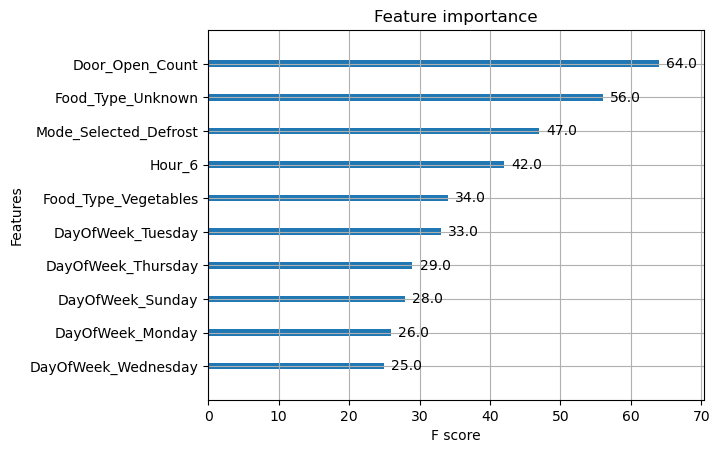

In [62]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(best_model, max_num_features=10)
plt.show()

We can see that:<br>
Even after tuning, the model is not capturing the true relationship between predictors and Power_Consumed. <br>
The negative R² means that the model is not providing useful predictive power compared to a simple baseline. <br>
The normalized RMSE > 1 (by std) suggests the model is not competitive with the natural variation in the data.<br>
</p>
Possible Reasons:<br>
<b>Key drivers excluded</b>: Since Power_Consumed is derived directly from Duration_Seconds × Power_Level_Value, excluding these variables will make prediction extremely difficult. <br>
<b>Weak signal in other predictors</b>: Variables like Food_Type, Mode_Selected, DayOfWeek may not strongly determine consumption without duration/power level. <br>

We can try to explore another model. Since we have a lot of categorical variables, we can use <b>CatBootRegressor</b>

In [68]:
!pip install -q catboost

In [70]:
from catboost import CatBoostRegressor

X = microwave_df.drop(columns=['Power_Consumed','Duration_Seconds','Power_Level_Value'])
y = microwave_df['Power_Consumed']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# categorical columns
categorical_vars = ['Food_Type', 'Mode_Selected', 'DayOfWeek','Hour','Door_Open_Count']

# define and train
cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=100
)

cat_model.fit(X_train, y_train, cat_features=categorical_vars)

y_pred_cat = cat_model.predict(X_test)

rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
r2_cat = r2_score(y_test, y_pred_cat)

print(f"CatBoost RMSE: {rmse_cat:.3f}")
print(f"CatBoost R^2: {r2_cat:.3f}")

0:	learn: 442.7639197	total: 183ms	remaining: 1m 31s
100:	learn: 319.6824659	total: 6.95s	remaining: 27.5s
200:	learn: 223.0735327	total: 14.8s	remaining: 22s
300:	learn: 158.4766427	total: 22.8s	remaining: 15.1s
400:	learn: 109.8039126	total: 30.6s	remaining: 7.55s
499:	learn: 80.2957779	total: 38.4s	remaining: 0us
CatBoost RMSE: 520.520
CatBoost R^2: -0.154


<b>Our CatBoostRegressor performs just about as badly as the XGBoost model</b><br>
This goes to show that the other variables are basically just adding noise to our data.
If we look at our overall exploration, the findings we have got are that the microwave data such as 'Food_Type', 'Mode_Selected', 'DayOfWeek','Hour' and 'Door_Open_Count' don't really help us predict the Power_Consumed by the microwave.

## Section 4: Evaluation

### Project Summary and Findings

#### Objective
We aimed to explore how non-personal data collected from home appliances can be used to model usage patterns, and derive actionable insights for product enhancement and business optimization.

#### Data Overview
The dataset included variables such as:

- Appliance usage characteristics: `Duration_Seconds`, `Power_Level_Value`
- Contextual features: `Mode_Selected`, `Food_Type`, `Door_Open_Count`, `Hour`, `DayOfWeek`
- Derived target: `Power_Consumed` (computed as `Duration_Seconds × Power_Level_Value`)

### Analysis Conducted

#### 1. Data Visualisation
- Chicken is the most frequently microwaved foodtype.
- Users tend to use the 'Medium' setting the most on the microwave.
- The most commonly used time for the microwave is 0100.
- The microwave is most commonly used on Wednesdays.

#### 2. Statistical Tests (Kruskal–Wallis)
- Tested whether categorical features (`Mode_Selected`, `Food_Type`, `DayOfWeek`) influenced `Power_Consumed`.
- **Result:** No significant effect; these features do not explain variation in the target.

#### 3. Machine Learning Models
- XGBoost and CatBoost regressors were trained to predict `Power_Consumed` using the categorical/contextual features.
- **Metrics:** RMSE > 500, R² negative.
- **Normalized RMSE (relative to target variability):** ≈ 1.05
- **Interpretation:** Models failed to capture meaningful predictive patterns from these features.

### Key Insights
- **Usage patterns reveal common behavior:** The patterns provide insight into general user habits and appliance utilization.
- **Predictive modeling limitations:** Despite clear usage patterns, statistical tests (Kruskal–Wallis) and machine learning models (XGBoost, CatBoost) showed that these contextual and categorical features do **not meaningfully predict `Power Consumed`** by the apppliance. RMSE values were high and R² values were negative, indicating that these features explain very little of the variation in energy consumption. More data is required to accurately predict the power consumed if the company wants to work on energy efficiency in their products.
- **Primary drivers of energy consumption:** The key determinants of `Power_Consumed` were the numeric features directly used in its computation (`Duration_Seconds` and `Power_Level_Value`). The other nonpersonal data adds insignificant predictive value for energy consumption.
- **Potential for feature-driven insights:** While the current features are weak predictors of power consumption, they may still be valuable for understanding **user behavior patterns, preferences, and appliance usage trends**, which could inform product design and marketing strategies.


### Business Implications
- Non-personal data collected from appliances can be useful, but only if it contains valuable predictive data.
- **Future directions:** If a wider breadth of data can be obtained from the devices, it could go a long way in providing predictive insights. Moreover, more feature engineering can be done to identify valuable composite target variables.

### Conclusion
- **Prediction of energy consumption from non-primary features is not feasible:** Models trained on categorical and contextual features alone fail to provide accurate predictions of `Power_Consumed`.
- **Value lies in behavioral insights rather than energy prediction:** The non-personal data can be leveraged to understand user habits, optimize appliance design, or tailor user experiences, but cannot replace the core energy metrics derived from usage duration and power settings.